In [4]:
import numpy as np
import matplotlib.pyplot as plt

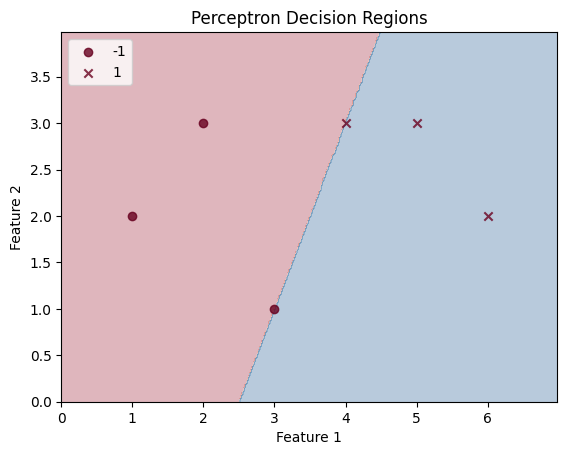

In [5]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

def plot_decision_regions(X, y, classifier):
    resolution = 0.02
    markers = ('o', 'x')
    colors = ('blue', 'red')
    cmap = plt.cm.RdBu

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl)
    
    plt.legend('upper left')
# Example usage
X = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]])
y = np.array([-1, -1, -1, 1, 1, 1])

perceptron = Perceptron()
perceptron.train(X, y)

plot_decision_regions(X, y, classifier=perceptron)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.title('Perceptron Decision Regions')
plt.show()
